In [18]:
# '''
# 文件目录
# ---train
#     ---imgae
#     ---mask
# ---test
#     ---image
# ---infers
# --models
# ---base.ipynb
# '''

In [19]:
#加载一些基础的库
import torch
import os
import numpy as np
import torchvision
from tqdm import tqdm #一个实现进度条的库
import random

### 数据增强

In [20]:
# #导入数据增强工具
# import Augmentor
 
# #确定原始图像存储路径以及标签图的文件存储路径，创建Pipeline实例p
# p = Augmentor.Pipeline(r"train\image")
# p.ground_truth(r"train\mask")

# # 图像旋转： 按照概率0.8执行，范围在0-25之间
# p.rotate(probability=0.5, max_left_rotation=3, max_right_rotation=3)
 
# # 图像左右互换：
# p.flip_left_right(probability=0.7)
# p.flip_top_bottom(probability=0.3)
 
# # 图像放大缩小： 按照概率0.8执行，
# p.zoom_random(probability=0.8, percentage_area=0.9)
 
# #scale_factor表示缩放比例，只能大于1，且为等比放大。
# p.scale(probability=0.5, scale_factor=1.05)
 
# # #小块变形
# # p.random_distortion(probability=0.8,grid_width=10,grid_height=10, magnitude=20)
 
# #随机亮度增强/减弱，min_factor, max_factor为变化因子，决定亮度变化的程度，可根据效果指定
# p.random_brightness(probability=0.5, min_factor=0.9, max_factor=1.1)
 
# # #随机颜色/对比度增强/减弱
# # #p.random_color(probability=1, min_factor=0.0, max_factor=1)
# p.random_contrast(probability=0.5, min_factor=0.9, max_factor=1.1)
 
# # #随机剪切(shear)  max_shear_left，max_shear_right为剪切变换角度  范围0-25
# # p.shear(probability=1, max_shear_left=10, max_shear_right=10)
 
# # #随机裁剪(random_crop)
# # p.crop_random(probability=1, percentage_area=0.9, randomise_percentage_area=True)
 
# #随机翻转(flip_random)
# p.flip_random(probability=0.5)
 
# # 最终扩充的数据样本数可以更换为100。1000等
# p.sample(3000,'img_augmentation')  

In [21]:
# import os
# import shutil

# def move_files_by_prefix(source_folder, target_folder_groundtruth, target_folder_image_original):
#     # 检查源文件夹路径是否存在
#     if not os.path.isdir(source_folder):
#         print("源文件夹路径不存在。")
#         return
    
#     # 确保目标文件夹存在
#     if not os.path.isdir(target_folder_groundtruth):
#         os.makedirs(target_folder_groundtruth)
#         print(f"目标文件夹 {target_folder_groundtruth} 已创建。")
    
#     if not os.path.isdir(target_folder_image_original):
#         os.makedirs(target_folder_image_original)
#         print(f"目标文件夹 {target_folder_image_original} 已创建。")

#     # 遍历源文件夹中的所有文件
#     for filename in os.listdir(source_folder):
#         source_file_path = os.path.join(source_folder, filename)
        
#         # 确保当前对象是一个文件而不是文件夹
#         if os.path.isfile(source_file_path):
#             # 根据文件名前缀移动文件
#             if filename.startswith("_groundtruth_"):
#                 shutil.move(source_file_path, os.path.join(target_folder_groundtruth, filename))
#                 print(f"已移动到 {target_folder_groundtruth}: {filename}")
#             elif filename.startswith("image_original"):
#                 shutil.move(source_file_path, os.path.join(target_folder_image_original, filename))
#                 print(f"已移动到 {target_folder_image_original}: {filename}")


# source_folder = r'img_augmentation\output'
# target_folder_groundtruth = r'img_augmentation\lb'
# target_folder_image_original = r'img_augmentation\img'
# move_files_by_prefix(source_folder, target_folder_groundtruth, target_folder_image_original)


In [22]:
# import os
# import shutil

# def remove_first_char_from_filenames(folder_path):
#     # 检查文件夹路径是否存在
#     if not os.path.isdir(folder_path):
#         print("指定的路径不存在或不是一个文件夹。")
#         return

#     # 遍历文件夹中的所有文件和文件夹
#     for filename in os.listdir(folder_path):
#         old_file_path = os.path.join(folder_path, filename)

#         # 确保当前对象是一个文件而不是文件夹
#         if os.path.isfile(old_file_path):
#             # 生成新文件名（去掉第一个字符）
#             new_filename = filename[15:] if len(filename) > 0 else filename
#             new_file_path = os.path.join(folder_path, new_filename)
            
#             # 重命名文件
#             shutil.move(old_file_path, new_file_path)
#             print(f"已重命名：{filename} -> {new_filename}")
#         else:
#             print(f"跳过文件夹：{filename}")


# folder_path = r'img_augmentation\img'
# remove_first_char_from_filenames(folder_path)


In [23]:
# import os
# import shutil

# def remove_first_char_from_filenames(folder_path):
#     # 检查文件夹路径是否存在
#     if not os.path.isdir(folder_path):
#         print("指定的路径不存在或不是一个文件夹。")
#         return

#     # 遍历文件夹中的所有文件和文件夹
#     for filename in os.listdir(folder_path):
#         old_file_path = os.path.join(folder_path, filename)

#         # 确保当前对象是一个文件而不是文件夹
#         if os.path.isfile(old_file_path):
#             # 生成新文件名（去掉第一个字符）
#             new_filename = filename[23:] if len(filename) > 0 else filename
#             new_file_path = os.path.join(folder_path, new_filename)
            
#             # 重命名文件
#             shutil.move(old_file_path, new_file_path)
#             print(f"已重命名：{filename} -> {new_filename}")
#         else:
#             print(f"跳过文件夹：{filename}")


# folder_path = r'img_augmentation\lb'
# remove_first_char_from_filenames(folder_path)

In [24]:
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image
import cv2

transform=transforms.Compose({
    #转化为Tensor
    transforms.ToTensor()
})

#首先继承Dataset写一个对于数据进行读入和处理的方式
class MyDataset(Dataset):
    def __init__(self,path):
        self.mode=('train' if 'mask' in os.listdir(path) else 'test')#表示训练模式
        self.path=path#图片路径
        dirlist=os.listdir(path+'image/')#图片的名称
        self.name=[n for n in dirlist if n[-3:]=='png'] #只读取图片
        
    def __len__(self):
        return len(self.name)
    
    def __getitem__(self,index):#获取数据的处理方式
        name=self.name[index]
        #读取原始图片和标签
        if self.mode=='train':#训练模式
            ori_img=cv2.imread(self.path+'image/'+name)#原始图片
            lb_img=cv2.imread(self.path+'mask/'+name)#标签图片
            ori_img=cv2.cvtColor(ori_img,cv2.COLOR_BGR2RGB)#转为RGB三通道图
            lb_img=cv2.cvtColor(lb_img,cv2.COLOR_BGR2GRAY)#掩膜转为灰度图

            ori_img=cv2.resize(ori_img,(640,320),interpolation=cv2.INTER_LINEAR)
            lb_img=cv2.resize(lb_img,(640,320),interpolation=cv2.INTER_LINEAR)
            
            return transform(ori_img),transform(lb_img)
        
        if self.mode=='test':#测试模式
            ori_img=cv2.imread(self.path+'image/'+name)#原始图片
            ori_img=cv2.cvtColor(ori_img,cv2.COLOR_BGR2RGB)#转为RGB三通道图
            return transform(ori_img)

#加载数据集
train_path='train/'
traindata=MyDataset(train_path)

原始图片张量的形状: torch.Size([3, 320, 640])
标签图片张量的形状: torch.Size([1, 320, 640])


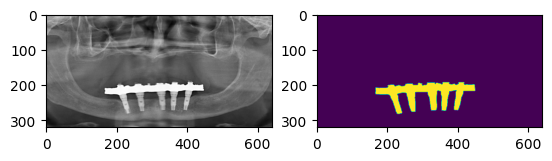

In [26]:
#查看图片读取效果
import matplotlib.pyplot as plt
o_img,l_img=traindata[np.random.randint(0,2000)]
plt.subplot(1,2,1)
plt.imshow(o_img.permute(1,2, 0))
plt.subplot(1,2,2)
plt.imshow(l_img.permute(1,2, 0))
print("原始图片张量的形状:",o_img.shape)
print("标签图片张量的形状:",l_img.shape)#([1, 320, 640]) 其中 1 表示分类类别，我们为2分类任务,类别表示为01

In [27]:
#配置模型超参数
#模型保存的路径
model_path='models/'
#推荐使用gpu进行训练
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
#学习率
lr=3e-3
#学习率衰减
weight_decay=1e-3
#批大小
bs=8
#训练轮次
epochs = 40

In [28]:
import torchvision
import torch.nn as nn
import segmentation_models_pytorch as smp
'''
加载经典用于医学图像分割的UNet,encoder_name为模型的backbone
encoder_weigths可选imagenet或者None代表是否加载预训练参数
in_channel为输入图像的通道数
classes为分类数目
'''

'''optional:
    Unet
    FPN
    Linknet
    PSPNet
'''
model_Unet = smp.Unet(
        encoder_name="resnet34",  
        encoder_weights='imagenet',
        in_channels=3,
        classes=1,
    )

model_FPN = smp.FPN(
        encoder_name="resnet34",  
        encoder_weights='imagenet',
        in_channels=3,
        classes=1,
    )

model_Linknet = smp.Linknet(
        encoder_name="resnet34",  
        encoder_weights='imagenet',
        in_channels=3,
        classes=1,
    )

model_PSPNet = smp.PSPNet(
        encoder_name="resnet34",  
        encoder_weights='imagenet',
        in_channels=3,
        classes=1,
    )

# model_list = [model_Unet,model_FPN,model_Linknet,model_PSPNet]
##打印模型信息
#print(model) 

In [29]:
#根据赛题评测选用dice_loss，这个是开源代码
def dice_loss(logits, target):
    smooth = 1.
    prob  = torch.sigmoid(logits)
    batch = prob.size(0)
    prob   = prob.view(batch,1,-1)
    target = target.view(batch,1,-1)
    intersection = torch.sum(prob*target, dim=2)
    denominator  = torch.sum(prob, dim=2) + torch.sum(target, dim=2)
    dice = (2*intersection + smooth) / (denominator + smooth)
    dice = torch.mean(dice)
    dice_loss = 1. - dice
    return dice_loss

#训练前准备
from torch.utils.data import DataLoader
#使用traindata创建dataloader对象
trainloader=DataLoader(traindata,batch_size=bs, shuffle=True, num_workers=0, drop_last=True)

In [30]:
#加载模型到gpu或cpu
model_Unet.to(device)
#使用Binary CrossEntropy作为损失函数，主要处理二分类问题
# BCEloss=nn.BCELoss()
#加载优化器,使用Adam,主要是炼的快(๑ت๑)
optim_Unet=torch.optim.Adam(model_Unet.parameters(),lr=lr, weight_decay=weight_decay)
#开始炼丹 没有做验证集，各位可以以自己需要去添加

loss_last=99999
best_model_name='x'

#记录loss变化
for epoch in range(1,epochs+1):
    for step,(inputs,labels) in tqdm(enumerate(trainloader),desc=f"Epoch {epoch}/{epochs}",
                                       ascii=True, total=len(trainloader)):
        #原始图片和标签
        inputs, labels = inputs.to(device), labels.to(device)
        out = model_Unet(inputs)
        loss = dice_loss(out, labels)
        # 后向
        optim_Unet.zero_grad()
        #梯度反向传播
        loss.backward()
        optim_Unet.step()
    #损失小于上一轮则添加
    if loss<loss_last:
        loss_last=loss
        torch.save(model_Unet.state_dict(),model_path+'UNET_model_epoch{}_loss{}.pth'.format(epoch,loss))
        best_model_name=model_path+'model_epoch{}_loss{}.pth'.format(epoch,loss)
    print(f"\nEpoch: {epoch}/{epochs},DiceLoss:{loss}")

In [31]:
#加载模型到gpu或cpu
model_FPN.to(device)
#使用Binary CrossEntropy作为损失函数，主要处理二分类问题
# BCEloss=nn.BCELoss()
#加载优化器,使用Adam,主要是炼的快(๑ت๑)
optim_FPN=torch.optim.Adam(model_FPN.parameters(),lr=lr, weight_decay=weight_decay)
#开始炼丹 没有做验证集，各位可以以自己需要去添加

loss_last=99999
best_model_name='x'

#记录loss变化
for epoch in range(1,epochs+1):
    for step,(inputs,labels) in tqdm(enumerate(trainloader),desc=f"Epoch {epoch}/{epochs}",
                                       ascii=True, total=len(trainloader)):
        #原始图片和标签
        inputs, labels = inputs.to(device), labels.to(device)
        out = model_FPN(inputs)
        loss = dice_loss(out, labels)
        # 后向
        optim_FPN.zero_grad()
        #梯度反向传播
        loss.backward()
        optim_FPN.step()
    #损失小于上一轮则添加
    if loss<loss_last:
        loss_last=loss
        torch.save(model_FPN.state_dict(),model_path+'FPN_model_epoch{}_loss{}.pth'.format(epoch,loss))
        best_model_name=model_path+'model_epoch{}_loss{}.pth'.format(epoch,loss)
    print(f"\nEpoch: {epoch}/{epochs},DiceLoss:{loss}")

In [32]:
#加载模型到gpu或cpu
model_Linknet.to(device)
#使用Binary CrossEntropy作为损失函数，主要处理二分类问题
# BCEloss=nn.BCELoss()
#加载优化器,使用Adam,主要是炼的快(๑ت๑)
optim_Linknet=torch.optim.Adam(model_Linknet.parameters(),lr=lr, weight_decay=weight_decay)
#开始炼丹 没有做验证集，各位可以以自己需要去添加

loss_last=99999
best_model_name='x'

#记录loss变化
for epoch in range(1,epochs+1):
    for step,(inputs,labels) in tqdm(enumerate(trainloader),desc=f"Epoch {epoch}/{epochs}",
                                       ascii=True, total=len(trainloader)):
        #原始图片和标签
        inputs, labels = inputs.to(device), labels.to(device)
        out = model_Linknet(inputs)
        loss = dice_loss(out, labels)
        # 后向
        optim_Linknet.zero_grad()
        #梯度反向传播
        loss.backward()
        optim_Linknet.step()
    #损失小于上一轮则添加
    if loss<loss_last:
        loss_last=loss
        torch.save(model_Linknet.state_dict(),model_path+'model_Linknet_epoch{}_loss{}.pth'.format(epoch,loss))
        best_model_name=model_path+'model_epoch{}_loss{}.pth'.format(epoch,loss)
    print(f"\nEpoch: {epoch}/{epochs},DiceLoss:{loss}")

In [33]:
#加载模型到gpu或cpu
model_PSPNet.to(device)
#使用Binary CrossEntropy作为损失函数，主要处理二分类问题
# BCEloss=nn.BCELoss()
#加载优化器,使用Adam,主要是炼的快(๑ت๑)
optim_PSPNet=torch.optim.Adam(model_PSPNet.parameters(),lr=lr, weight_decay=weight_decay)
#开始炼丹 没有做验证集，各位可以以自己需要去添加

loss_last=99999
best_model_name='x'

#记录loss变化
for epoch in range(1,epochs+1):
    for step,(inputs,labels) in tqdm(enumerate(trainloader),desc=f"Epoch {epoch}/{epochs}",
                                       ascii=True, total=len(trainloader)):
        #原始图片和标签
        inputs, labels = inputs.to(device), labels.to(device)
        out = model_PSPNet(inputs)
        loss = dice_loss(out, labels)
        # 后向
        optim_PSPNet.zero_grad()
        #梯度反向传播
        loss.backward()
        optim_PSPNet.step()
    #损失小于上一轮则添加
    if loss<loss_last:
        loss_last=loss
        torch.save(model_PSPNet.state_dict(),model_path+'model_PSPNet_epoch{}_loss{}.pth'.format(epoch,loss))
        best_model_name=model_path+'model_epoch{}_loss{}.pth'.format(epoch,loss)
    print(f"\nEpoch: {epoch}/{epochs},DiceLoss:{loss}")

In [34]:
assert(True)

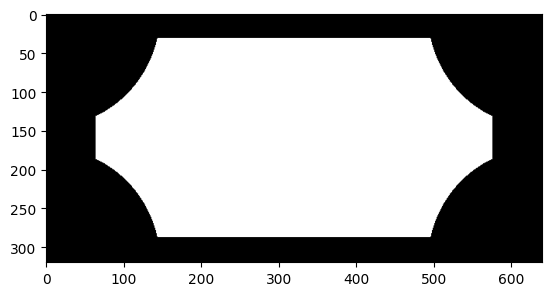

In [35]:
def cut_corner(image):
    """
    将输入图片四个角半径为高度一半的圆内的值全改为0，并且将图片上下6%的部分和左右10%的部分改为0。
    该版本支持批次处理，允许输入的第一个维度为批次大小。
    
    :param image: 输入的图片，维度为(B, C, H, W)或(C, H, W)，其中B是批次大小，C是通道数，H是高度，W是宽度。
    :return: 处理后的图片。
    """
    if image.dim() == 4:
        batch_size, C, H, W = image.shape
    elif image.dim() == 3:
        C, H, W = image.shape
        image = image.unsqueeze(0)  # 添加批次维度以统一处理
    else:
        raise ValueError("Input image must have 3 or 4 dimensions.")
    
    radius = H / 3 + 40 # 半径为高度的一半

    y_coordinate = torch.arange(H).unsqueeze(1).expand(H, W).to(image.device)
    x_coordinate = torch.arange(W).unsqueeze(0).expand(H, W).to(image.device)
    
    corners = [(0, 0), (0, W-1), (H-1, 0), (H-1, W-1)]
    
    mask = torch.ones((C, H, W), dtype=torch.bool, device=image.device)  # 使用第一个图像的尺寸创建mask
    
    for corner in corners:
        y_corner, x_corner = corner
        distance = torch.sqrt((x_coordinate - x_corner)**2 + (y_coordinate - y_corner)**2)
        mask[:, distance <= radius] = 0
    
    # 边缘部分处理
    top_edge = int(H * 0.1)  # 上下10%
    bottom_edge = H - top_edge
    left_edge = int(W * 0.1)  # 左右10%
    right_edge = W - left_edge
    
    # 更新mask以去除边缘部分
    mask[:, :top_edge, :] = 0
    mask[:, bottom_edge:, :] = 0
    mask[:, :, :left_edge] = 0
    mask[:, :, right_edge:] = 0
    
    # 应用mask到所有图片
    image *= mask.unsqueeze(0)  # 增加批次维度以匹配image的形状
    
    # 如果输入没有批次维度，去除增加的批次维度
    if image.shape[0] == 1 and image.dim() == 4 and C != 1:
        image = image.squeeze(0)
    
    return image

# 创建一个全1的图像
image = torch.ones(3, 320, 640)

# 使用cut_corner函数处理图像
processed_image = cut_corner(image)

# 将处理后的图像转换为numpy数组
processed_image_np = processed_image.numpy()

# 绘制处理后的图像
plt.imshow(processed_image_np.transpose(1, 2, 0))
plt.show()


torch.Size([3, 320, 640])
torch.Size([1, 1, 320, 640])


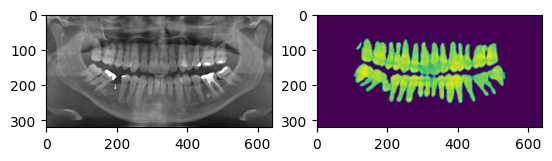

In [36]:
# # model_list = [model_Unet,model_FPN,model_Linknet,model_PSPNet]
# model_Unet.to(device)
# model_FPN.to(device)
# model_Linknet.to(device)
# model_PSPNet.to(device)
# #加载测试集
# test_path='test/'
# testdata=MyDataset(test_path)
# testloader=DataLoader(testdata,batch_size=bs, shuffle=True, num_workers=0,drop_last=True)


# def normalization(t):
#         t = (t-float(torch.min(t)))/(float(torch.max(t))-float(torch.min(t)))
#         return t

# #加载最优模型
# model_Unet.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\UNET_model_epoch26_loss0.09203720092773438.pth'))
# model_FPN.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\FPN_model_epoch27_loss0.09575045108795166.pth'))
# model_Linknet.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\model_Linknet_epoch8_loss0.10153055191040039.pth'))
# model_PSPNet.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\model_PSPNet_epoch24_loss0.11499154567718506.pth'))



# #测试模型的预测效果
# x=np.random.randint(0,500)
# inputs=testdata[x].to(device)
# print(inputs.shape)
# threshold=0.5
# with torch.no_grad():
#     # 模型预测
#     pre1 = model_Unet(inputs.view(1,3,320,640))
#     print(pre1.shape)
#     pre1 = pre1.expand(1, 3, 320, 640)
#     pre1 = normalization(pre1)
#     pre1 = torch.where(pre1 >=threshold, torch.tensor(255,dtype=torch.float).to(device), pre1)
#     pre1= torch.where(pre1 < threshold, torch.tensor(0,dtype=torch.float).to(device), pre1)
#     pre2 = model_FPN(pre1.view(1,3,320,640))
#     # pre3 = model_Linknet(inputs.view(1,3,320,640))
#     # pre4 = model_PSPNet(inputs.view(1,3,320,640))
#     # pre1 = normalization(pre1)
#     pre2 = normalization(pre2)
#     # pre3 = normalization(pre3)
#     # pre4 = normalization(pre4)

#     # pre = (pre1+pre2+pre3+pre4)/4
#     pre = cut_corner(pre2)

# plt.subplot(1,2,1)
# plt.imshow(testdata[x].permute(1,2,0))
# #对预测的图片采取一定的阈值进行分类
# threshold=0.6
# t= torch.where(pre >=threshold, torch.tensor(255,dtype=torch.float).to(device), pre)
# t= torch.where(pre < threshold, torch.tensor(0,dtype=torch.float).to(device), pre)
# t=t.cpu().view(1,320,640)
# plt.subplot(1,2,2)
# plt.imshow(t.permute(1,2,0))

In [ ]:
# model_list = [model_Unet,model_FPN,model_Linknet,model_PSPNet]
model_Unet.to(device)
model_FPN.to(device)
model_Linknet.to(device)
model_PSPNet.to(device)
#加载测试集
test_path='test/'
testdata=MyDataset(test_path)
testloader=DataLoader(testdata,batch_size=bs, shuffle=True, num_workers=0,drop_last=True)


def normalization(t):
        t = (t-float(torch.min(t)))/(float(torch.max(t))-float(torch.min(t)))
        return t

#加载最优模型
model_Unet.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\UNET_model_epoch26_loss0.09203720092773438.pth'))
model_FPN.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\FPN_model_epoch27_loss0.09575045108795166.pth'))
model_Linknet.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\model_Linknet_epoch8_loss0.10153055191040039.pth'))
model_PSPNet.load_state_dict(torch.load(r'E:\desk\tooth_for_tainchi\models\model_PSPNet_epoch24_loss0.11499154567718506.pth'))



#测试模型的预测效果
x=np.random.randint(0,500)
inputs=testdata[x].to(device)
print(inputs.shape)
threshold=0.5
with torch.no_grad():
    # 模型预测
    pre1 = model_Unet(inputs.view(1,3,320,640))
    pre2 = model_FPN(inputs.view(1,3,320,640))
    pre3 = model_Linknet(inputs.view(1,3,320,640))
    pre4 = model_PSPNet(inputs.view(1,3,320,640))
    pre1 = normalization(pre1)
    pre2 = normalization(pre2)
    pre3 = normalization(pre3)
    pre4 = normalization(pre4)

    pre = (pre1+pre2+pre3+pre4)/4
    pre = cut_corner(pre)

plt.subplot(1,2,1)
plt.imshow(testdata[x].permute(1,2,0))
#对预测的图片采取一定的阈值进行分类
threshold=0.6
t= torch.where(pre >=threshold, torch.tensor(255,dtype=torch.float).to(device), pre)
t= torch.where(pre < threshold, torch.tensor(0,dtype=torch.float).to(device), pre)
t=t.cpu().view(1,320,640)
plt.subplot(1,2,2)
plt.imshow(t.permute(1,2,0))

### Unet输出用FPN预测

In [37]:
# # model_list = [model_Unet,model_FPN,model_Linknet,model_PSPNet]

# from torchvision.utils import save_image
# from PIL import Image

# img_save_path='infers/'


# for i,inputs in tqdm(enumerate(testdata)):
#     #原始图片和标签
#     inputs=inputs.reshape(1,3,320,640).to(device)
#     # 输出生成的图像

#     out1 = model_Unet(inputs.view(1,3,320,640)) # 模型预测

#     out1 = out1.expand(1, 3, 320, 640)
#     out1 = torch.where(out1 >=threshold, torch.tensor(255,dtype=torch.float).to(device), out1)
#     out1= torch.where(out1 < threshold, torch.tensor(0,dtype=torch.float).to(device), out1)
#     out1 = normalization(out1)

#     out2 = model_FPN(out1.view(1,3,320,640)) # 模型预测

    
#     # out3 = model_Linknet(inputs.view(1,3,320,640)) # 模型预测
#     # out4 = model_PSPNet(inputs.view(1,3,320,640)) # 模型预测

#     #out1 = normalization(out1)
#     out2 = normalization(out2)
#     # out3 = normalization(out3)
#     # out4 = normalization(out4)

#     out = out2
#     out = cut_corner(out)
#     #对输出的图像进行后处理
#     threshold=0.6
   
#     out= torch.where(out >=threshold, torch.tensor(255,dtype=torch.float).to(device),out)
#     out= torch.where(out < threshold, torch.tensor(0,dtype=torch.float).to(device),out)
    
    
#     #保存图像
#     out= out.detach().cpu().numpy().reshape(1,320,640)
#     #注意保存为1位图提交
#     img = Image.fromarray(out[0].astype(np.uint8))
#     img = img.convert('1')
#     img.save(img_save_path + testdata.name[i])


# #对保存的图像进行打包
# import zipfile

# def zip_files(file_paths, output_path):
#     with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
#         for file in file_paths:
#             zipf.write(file)
            
# #打包图片
# file_paths = [img_save_path+i for i in os.listdir(img_save_path) if i[-3:]=='png']
# output_path = 'infer.zip'
# zip_files(file_paths, output_path)

### 加权法模型融合

In [42]:
# model_list = [model_Unet,model_FPN,model_Linknet,model_PSPNet]

from torchvision.utils import save_image
from PIL import Image

img_save_path='infers/'


for i,inputs in tqdm(enumerate(testdata)):
    #原始图片和标签
    inputs=inputs.reshape(1,3,320,640).to(device)
    # 输出生成的图像

    out1 = model_Unet(inputs.view(1,3,320,640)) # 模型预测
    out2 = model_FPN(inputs.view(1,3,320,640)) # 模型预测
    out3 = model_Linknet(inputs.view(1,3,320,640)) # 模型预测
    out4 = model_PSPNet(inputs.view(1,3,320,640)) # 模型预测

    out1 = normalization(out1)
    out2 = normalization(out2)
    out3 = normalization(out3)
    out4 = normalization(out4)

    out = (out1+out2+out3+out4)/4
    out = cut_corner(out)
    #对输出的图像进行后处理
    threshold=0.55
   
    out= torch.where(out >=threshold, torch.tensor(255,dtype=torch.float).to(device),out)
    out= torch.where(out < threshold, torch.tensor(0,dtype=torch.float).to(device),out)
    
    
    #保存图像
    out= out.detach().cpu().numpy().reshape(1,320,640)
    #注意保存为1位图提交
    img = Image.fromarray(out[0].astype(np.uint8))
    img = img.convert('1')
    img.save(img_save_path + testdata.name[i])


#对保存的图像进行打包
import zipfile

def zip_files(file_paths, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in file_paths:
            zipf.write(file)
            
#打包图片
file_paths = [img_save_path+i for i in os.listdir(img_save_path) if i[-3:]=='png']
output_path = 'infer.zip'
zip_files(file_paths, output_path)

500it [00:35, 14.14it/s]


In [39]:
# #对保存的图像进行打包
# import zipfile

# def zip_files(file_paths, output_path):
#     with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
#         for file in file_paths:
#             zipf.write(file)
            
# #打包图片
# file_paths = [img_save_path+i for i in os.listdir(img_save_path) if i[-3:]=='png']
# output_path = 'infer.zip'
# zip_files(file_paths, output_path)

In [41]:
# from PIL import Image
# import os

# def convert_images_to_1bit(directory_path):
#     # 检查目录是否存在
#     if not os.path.exists(directory_path):
#         print("给定的路径不存在，请检查后再试。")
#         return
    
#     # 遍历目录下的所有文件
#     for filename in os.listdir(directory_path):
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#             # 构建完整的文件路径
#             file_path = os.path.join(directory_path, filename)
#             # 尝试打开图像文件
#             try:
#                 with Image.open(file_path) as img:
#                     # 转换为1位图像
#                     img = img.convert('1')
#                     # 保存转换后的图像，覆盖原图像或者保存为新的文件名
#                     img.save(file_path.replace('.', '.'))
#                     print(f"{filename} 转换成功。")
#             except Exception as e:
#                 print(f"处理 {filename} 时发生错误：{e}")

# if __name__ == "__main__":
#     # 替换为你想要转换图片的路径
#     path = r"E:\desk\tooth_for_tainchi\infers"
#     convert_images_to_1bit(path)


1.png 转换成功。
10.png 转换成功。
100.png 转换成功。
101.png 转换成功。
102.png 转换成功。
103.png 转换成功。
104.png 转换成功。
105.png 转换成功。
106.png 转换成功。
107.png 转换成功。
108.png 转换成功。
109.png 转换成功。
11.png 转换成功。
110.png 转换成功。
111.png 转换成功。
112.png 转换成功。
113.png 转换成功。
114.png 转换成功。
115.png 转换成功。
116.png 转换成功。
117.png 转换成功。
118.png 转换成功。
119.png 转换成功。
12.png 转换成功。
120.png 转换成功。
121.png 转换成功。
122.png 转换成功。
123.png 转换成功。
124.png 转换成功。
125.png 转换成功。
126.png 转换成功。
127.png 转换成功。
128.png 转换成功。
129.png 转换成功。
13.png 转换成功。
130.png 转换成功。
131.png 转换成功。
132.png 转换成功。
133.png 转换成功。
134.png 转换成功。
135.png 转换成功。
136.png 转换成功。
137.png 转换成功。
138.png 转换成功。
139.png 转换成功。
14.png 转换成功。
140.png 转换成功。
141.png 转换成功。
142.png 转换成功。
143.png 转换成功。
144.png 转换成功。
145.png 转换成功。
146.png 转换成功。
147.png 转换成功。
148.png 转换成功。
149.png 转换成功。
15.png 转换成功。
150.png 转换成功。
151.png 转换成功。
152.png 转换成功。
153.png 转换成功。
154.png 转换成功。
155.png 转换成功。
156.png 转换成功。
157.png 转换成功。
158.png 转换成功。
159.png 转换成功。
16.png 转换成功。
160.png 转换成功。
161.png 转换成功。
162.png 转换成功。
163.png 转换成功。
1